In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))



In [6]:
wsb_df = pd.read_csv('Clean_WSB.csv')




### Convert timestamp to datetime ### 
wsb_df['timestamp'] = wsb_df['timestamp'].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
wsb_df['title'] = wsb_df['title'].astype(str)
wsb_df['date'] = wsb_df['timestamp'].apply(lambda x: x.date())
wsb_df['date_hour'] = wsb_df['timestamp'].apply(lambda x: f"{x.date()} : {x.hour}")





### apply RE to remove emojis, punc., stopwords; explode title for easy groupby counting ###
wsb_df['title'] = wsb_df['title'].map(lambda x: re.sub(r"[^A-Za-z ]", '', x))
wsb_df['title'] = wsb_df['title'].map(lambda x: x.lower().split(' '))

wsb_df_explode = wsb_df.explode('title')

wsb_df_explode =  wsb_df_explode[ ~wsb_df_explode['title'].isin(stopwords)]


### narrow specific securities ###
wsb_full = wsb_df_explode.replace({'gamestop': 'gme', 'nokia': 'nok', 'dogecoin': 'doge', 
                                         'bitcoin': 'btc', 'amazon': 'amzn', 'microsft': 'msft',
                                         'tesla': 'tsla', 'indexsp': 'sp500', '500': 'sp500', 'sp': 'sp500'})

wsb_full

,Unnamed: 0,title,author,scores,comments,timestamp,date,date_hour
0,0,whats,Zaccko98,1,2,2021-02-16 04:53:12,2021-02-16,2021-02-16 : 4
0,0,going,Zaccko98,1,2,2021-02-16 04:53:12,2021-02-16,2021-02-16 : 4
0,0,pltr,Zaccko98,1,2,2021-02-16 04:53:12,2021-02-16,2021-02-16 : 4
1,1,need,toutoucnc,1,2,2021-02-16 04:53:09,2021-02-16,2021-02-16 : 4
1,1,explanations,toutoucnc,1,2,2021-02-16 04:53:09,2021-02-16,2021-02-16 : 4
...,...,...,...,...,...,...,...,...
572905,579472,hear,cheaptissueburlap,1,0,2020-12-31 16:21:52,2020-12-31,2020-12-31 : 16
572905,579472,f,cheaptissueburlap,1,0,2020-12-31 16:21:52,2020-12-31,2020-12-31 : 16
572906,579473,ive,1A9D6,1,6,2020-12-31 16:21:36,2020-12-31,2020-12-31 : 16
572906,579473,waiting,1A9D6,1,6,2020-12-31 16:21:36,2020-12-31,2020-12-31 : 16


In [23]:
wsb_df_groupby = wsb_full.groupby(['title']).count().reset_index()
wallstreetbets = wsb_df_groupby.sort_values('author', ascending = False)

wallstreetbets = wallstreetbets.drop(0)
wallstreetbets = wallstreetbets.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp', 'date'], axis =1)
wallstreetbets = wallstreetbets.rename(columns = {'title':'title','date_hour': 'count'})
wallstreetbets.head(30)

,title,count
27920,gme,102785
2081,amc,45965
9990,buy,45884
31969,hold,38734
58782,robinhood,29909
44758,moon,26679
35011,im,24674
66239,stock,23792
47379,nok,20994
40163,like,17808


In [17]:
### Big movers: GME, NOK, AMC, Dogecoin ### 
### Other popular stocks: bitcoin, AMZN, MSFT, TSLA ###
### Also SMP 500 and stock indexes. ###


gme = wallstreetbets[wallstreetbets['title'] == 'gme']
nok = wallstreetbets[wallstreetbets['title'] == 'nok']
amc = wallstreetbets[wallstreetbets['title'] == 'amc']
doge = wallstreetbets[wallstreetbets['title'] == 'doge']
btc = wallstreetbets[wallstreetbets['title'] == 'btc']
amzn = wallstreetbets[wallstreetbets['title'] == 'amzn']
msft = wallstreetbets[wallstreetbets['title'] == 'msft']
tsla = wallstreetbets[wallstreetbets['title'] == 'tsla']
sp500= (wallstreetbets['title'] == 'sp500')


stonks = wallstreetbets[(wallstreetbets['title'] == 'gme') | (wallstreetbets['title'] == 'nok') | 
                       (wallstreetbets['title'] == 'amc') | (wallstreetbets['title'] == 'doge') | 
                       (wallstreetbets['title'] == 'btc') | (wallstreetbets['title'] == 'amzn') |
                       (wallstreetbets['title'] == 'msft')| (wallstreetbets['title'] == 'tsla') |
                       (wallstreetbets['title'] == 'sp500')].sort_values('count', ascending = True)
stonks

,title,count
64721,sp500,30
45554,msft,44
2552,amzn,619
9386,btc,1578
72136,tsla,2717
18968,doge,15703
47379,nok,20994
2081,amc,45965
27920,gme,102785


Text(0, 0.5, 'Securities')

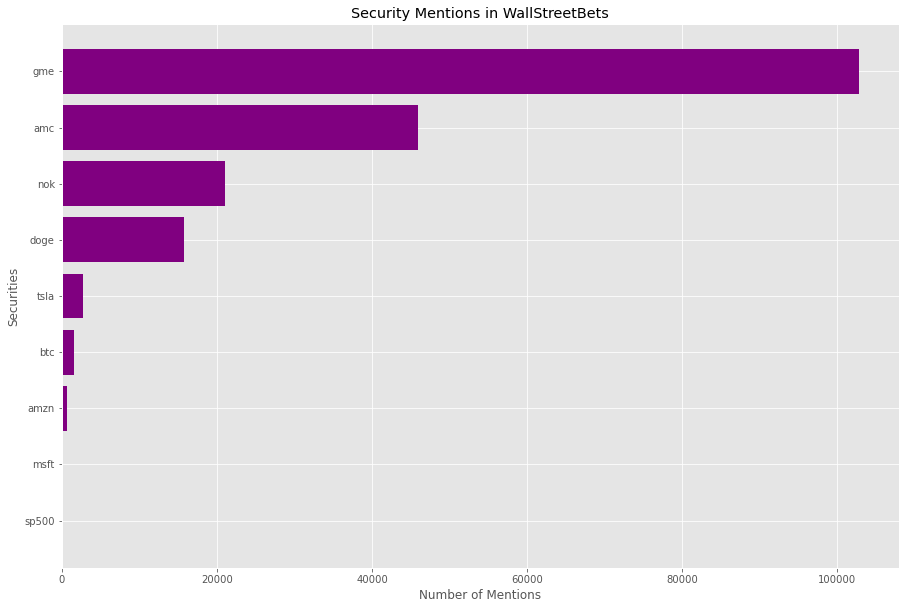

In [18]:
fig, ax = plt.subplots(figsize = (15,10))
x = stonks['title']
y = stonks['count']
ax.barh(x,y, color='purple')
ax.set_title('Security Mentions in WallStreetBets')
ax.set_xlabel('Number of Mentions')
ax.set_ylabel('Securities')

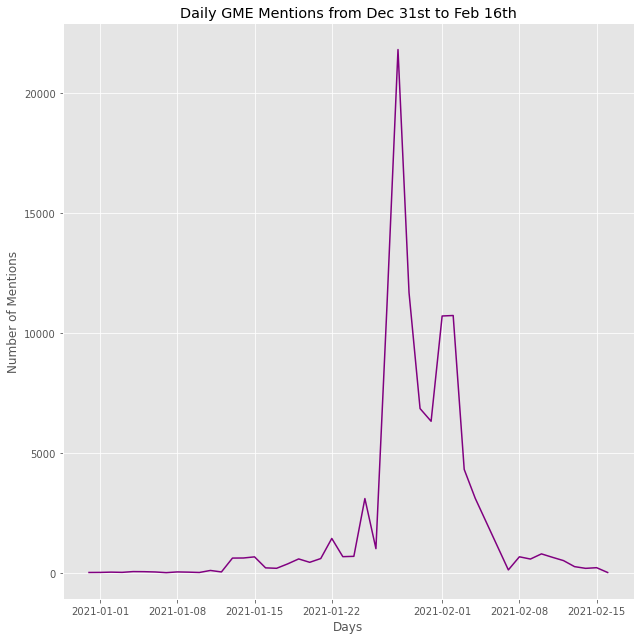

In [21]:
gme_date = wsb_full.groupby(['title','date']).count().reset_index()
gme_date = gme_date[gme_date['title'] == 'gme']
x = gme_date['date']
y = gme_date['author']

fig, ax = plt.subplots(figsize = (9,9))
ax.plot(x,y, color = 'purple')
ax.set_title('Daily GME Mentions from Dec 31st to Feb 16th')
ax.set_xlabel('Days')
ax.set_ylabel('Number of Mentions')
fig.tight_layout()

/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


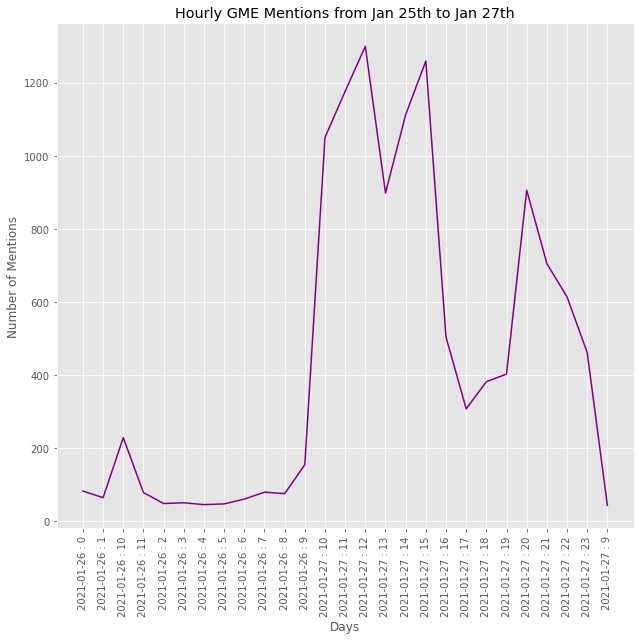

In [25]:
gme_date = wsb_full.groupby(['title','date_hour']).count().reset_index()
gme_date = gme_date[(gme_date['title'] == 'gme') & (gme_date['date_hour'] > '2021-01-25:0')&
                    (gme_date['date_hour'] < '2021-01-27:0')]
x = gme_date['date_hour']
y = gme_date['author']

fig, ax = plt.subplots(figsize = (9,9))
ax.plot(x,y, color = 'purple')
ax.set_title('Hourly GME Mentions from Jan 25th to Jan 27th')
ax.set_xlabel('Days')
ax.set_ylabel('Number of Mentions')
ax.set_xticklabels(y, rotation = 90)
fig.tight_layout()


In [24]:
### Use alpha vantage to gather daily and hourly stock data ###


from alpha_vantage.timeseries import TimeSeries

API_key = 'OZHBQ2Q48QC0NFRZ'

ts = TimeSeries(key = API_key,output_format='pandas')
data = ts.get_daily_adjusted('GME')
gme = data[0].reset_index()
gme_daily = gme[(gme['date'] >= '2020-12-31') & (gme['date'] <= '2021-02-16')]
gme_daily.to_csv('gme_daily_prices')
gme_daily=gme_daily.sort_values('date', ascending=True)



data = ts.get_intraday('GME', interval = '60min', outputsize='full')
gme = data[0].reset_index()
gme_hourly = gme[(gme['date'] >= '2021-01-25') & (gme['date'] <= '2021-01-27')]
gme_hourly = gme_hourly.sort_values('date', ascending=True)




In [25]:
gme_daily

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
34,2020-12-31,19.25,19.8000,18.8000,18.84,18.84,6922652.0,0.0,1.0
33,2021-01-04,19.00,19.1000,17.1500,17.25,17.25,10022474.0,0.0,1.0
32,2021-01-05,17.35,18.0765,17.2300,17.37,17.37,4961457.0,0.0,1.0
31,2021-01-06,17.34,18.9800,17.3300,18.36,18.36,6056248.0,0.0,1.0
30,2021-01-07,18.47,19.4500,18.0200,18.08,18.08,6129276.0,0.0,1.0
29,2021-01-08,18.18,18.3000,17.0800,17.69,17.69,6481960.0,0.0,1.0
28,2021-01-11,19.41,20.6500,19.0100,19.94,19.94,14927612.0,0.0,1.0
27,2021-01-12,19.96,20.4000,19.3168,19.95,19.95,6999775.0,0.0,1.0
26,2021-01-13,20.42,38.6500,20.0300,31.40,31.40,143530129.0,0.0,1.0
25,2021-01-14,38.09,43.0600,33.0500,39.91,39.91,93717410.0,0.0,1.0


In [26]:
gme_hourly

,date,1. open,2. high,3. low,4. close,5. volume
319,2021-01-25 05:00:00,72.5000,136.6300,72.2000,105.3900,1194735.0
318,2021-01-25 06:00:00,106.7700,109.0000,86.2500,96.7700,885972.0
317,2021-01-25 07:00:00,96.9300,101.7000,90.3500,94.4300,784325.0
316,2021-01-25 08:00:00,94.4800,97.0000,86.7200,91.6500,2187519.0
315,2021-01-25 09:00:00,91.7100,104.5300,86.9999,98.0500,4674120.0
314,2021-01-25 10:00:00,98.2650,103.0000,86.3200,89.7600,19162322.0
313,2021-01-25 11:00:00,89.6850,159.1800,85.0000,117.0700,51720237.0
312,2021-01-25 12:00:00,117.0700,120.0000,85.3900,99.5600,20758922.0
311,2021-01-25 13:00:00,99.9900,103.0000,61.1300,69.4200,25133190.0
310,2021-01-25 14:00:00,69.3000,81.5000,65.3700,76.7499,17781046.0
